# LIBRARIES

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import warnings
from collections import Counter
from wordcloud import WordCloud

warnings.filterwarnings("ignore")
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

try:
    df = pd.read_csv('/kaggle/input/dataset-04/reviews.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/kaggle/input/dataset-04/reviews.csv', encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv('/kaggle/input/dataset-04/reviews.csv', encoding='ISO-8859-1')

# EXPLORATORY DATA ANALYSIS

In [2]:
df.head()

,review,feedback
0,"the trouble is , its filmmakers run out of cle...",0
1,watching it is rather like viewing a long soap...,0
2,often silly  and gross  but it's rarely as m...,0
3,"the film never rises above a conventional , tw...",0
4,the character of zigzag is not sufficiently de...,0


In [3]:
df.shape

(10662, 2)

In [4]:
print(df['feedback'].value_counts())

feedback
0    5331
1    5331
Name: count, dtype: int64


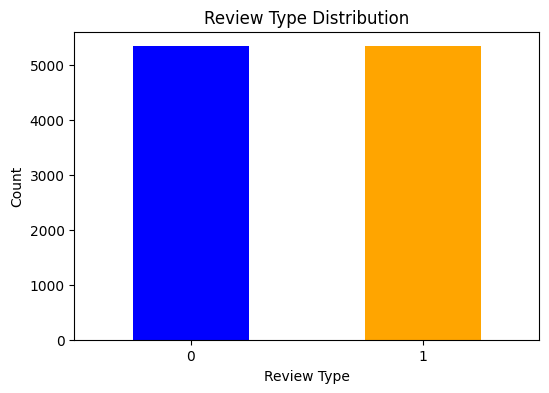

In [5]:
plt.figure(figsize=(6, 4))
df['feedback'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Review Type Distribution')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [6]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
print("\nSummary statistics of comment length:")
print(df['review_length'].describe())


Summary statistics of comment length:
count    10662.000000
mean        21.016038
std          9.412487
min          1.000000
25%         14.000000
50%         20.000000
75%         27.000000
max         59.000000
Name: review_length, dtype: float64


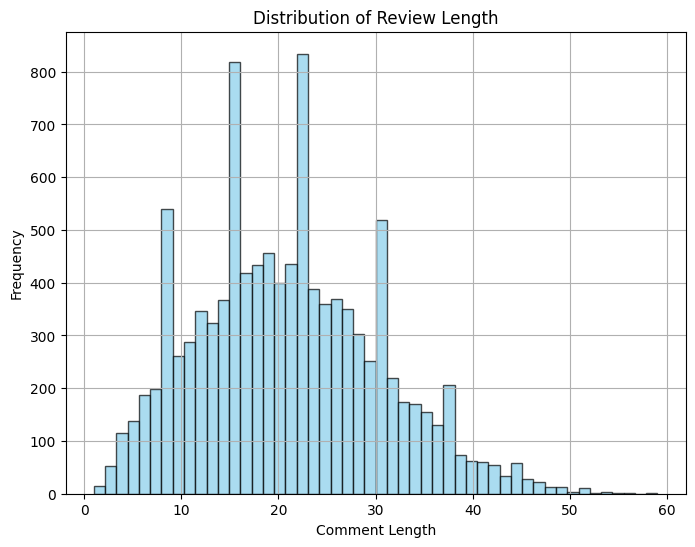

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
all_comments = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

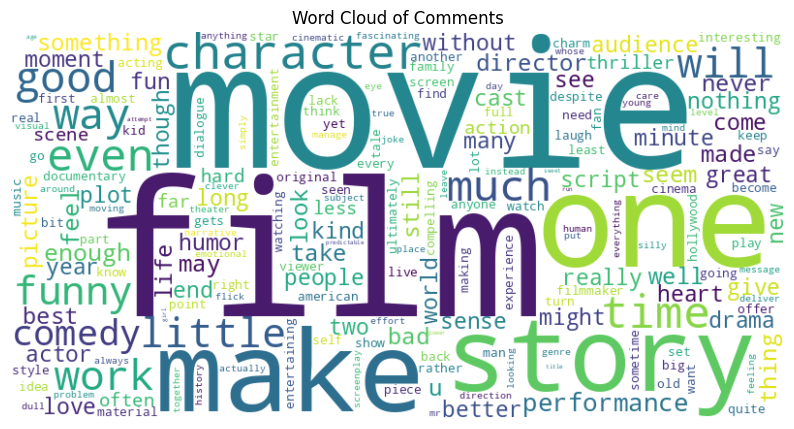

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Comments')
plt.axis('off')
plt.show()

In [10]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

X = df['review']
y = df['feedback']

# LOGISTIC REGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression

tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2))

X_tfidf = tf_idf.fit_transform(X)

model = LogisticRegression(solver='saga', max_iter=1000)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.7656982193064668, 0.7600749765698219, 0.773921200750469, 0.7560975609756098, 0.7551594746716698, 0.7711069418386491, 0.776735459662289, 0.7654784240150094, 0.7457786116322702, 0.7607879924953096]
Mean accuracy: 0.7630838861917564


In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       533
           1       0.76      0.76      0.76       533

    accuracy                           0.76      1066
   macro avg       0.76      0.76      0.76      1066
weighted avg       0.76      0.76      0.76      1066

Confusion Matrix:
[[405 128]
 [127 406]]


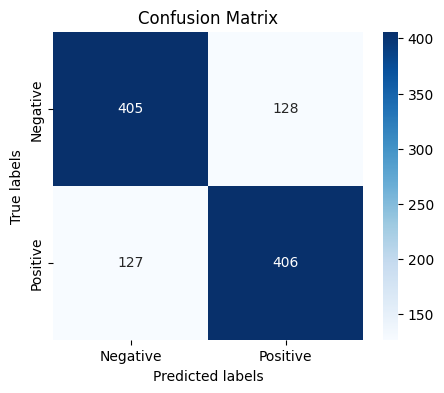

In [13]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# SVM-rbf

In [14]:
from sklearn.svm import SVC

tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english', ngram_range=(1, 2))

X_tfidf = tf_idf.fit_transform(df['review'])
y = df['feedback']

model = SVC(kernel='rbf')

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.7414181204276871, 0.7580191333708497, 0.7411367473269556]
Mean accuracy: 0.746858000375164


In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1777
           1       0.75      0.73      0.74      1777

    accuracy                           0.74      3554
   macro avg       0.74      0.74      0.74      3554
weighted avg       0.74      0.74      0.74      3554

Confusion Matrix:
[[1337  440]
 [ 480 1297]]


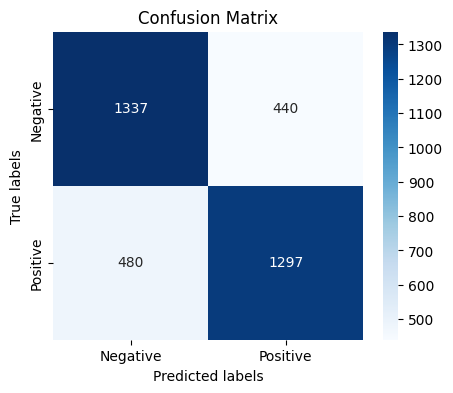

In [16]:
plt.figure(figsize=(5, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# SVM-linear

In [17]:
from sklearn.svm import SVC

tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english', ngram_range=(1, 2))

X_tfidf = tf_idf.fit_transform(df['review'])
y = df['feedback']

model = SVC(kernel='linear')

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.7478897017445132, 0.7656162070906022, 0.7563308947664603]
Mean accuracy: 0.7566122678671919


# KNN (n=3)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

X = df['review']
y = df['feedback']

tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english', ngram_range=(1, 2))

X_tfidf = tf_idf.fit_transform(X)
model = KNeighborsClassifier(n_neighbors=3)

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.5, 0.5, 0.6398424310635903]
Mean accuracy: 0.5466141436878634


# DECISION TREE

In [19]:
from sklearn.tree import DecisionTreeClassifier

X = df['review']
y = df['feedback']

tf_idf = TfidfVectorizer(sublinear_tf=True, analyzer='word', stop_words='english')
X_tfidf = tf_idf.fit_transform(X)

model = DecisionTreeClassifier()

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.6266178953292065, 0.657006190208216, 0.6339335959482274]
Mean accuracy: 0.6391858938285501


# RANDOM FOREST CLASSIFIER

In [20]:
from sklearn.ensemble import RandomForestClassifier

X = df['review']
y = df['feedback']

tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2))

X_tfidf = tf_idf.fit_transform(X)
model = RandomForestClassifier()

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.6983680360157569, 0.7245357343837929, 0.6921778277996623]
Mean accuracy: 0.7050271993997373


# BERNOULLI-NB

In [21]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['review']
y = df['feedback']

tf_idf = TfidfVectorizer(analyzer='word', sublinear_tf=True)  # Adjust parameters as needed
X_tfidf = tf_idf.fit_transform(X)

model = BernoulliNB()

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.768992684299381, 0.7822172200337648, 0.7734946539110861]
Mean accuracy: 0.7749015194147439


# GUASSIAN-NB

In [22]:
from sklearn.naive_bayes import GaussianNB

X = df['review']
y = df['feedback']

tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 3))  # Adjust parameters as needed

X_tfidf = tf_idf.fit_transform(X)

model = GaussianNB()

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train.toarray(), y_train)  # GaussianNB requires dense arrays
    
    y_pred = model.predict(X_test.toarray())  # GaussianNB requires dense arrays
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracy scores for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracy scores for each fold: [0.6980866629150253, 0.7045582442318514, 0.6865503657850309]
Mean accuracy: 0.6963984243106358
